<a href="https://colab.research.google.com/github/jongjong2323/colab01/blob/main/4_5_346p_~376p_(%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C380p_~382p_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


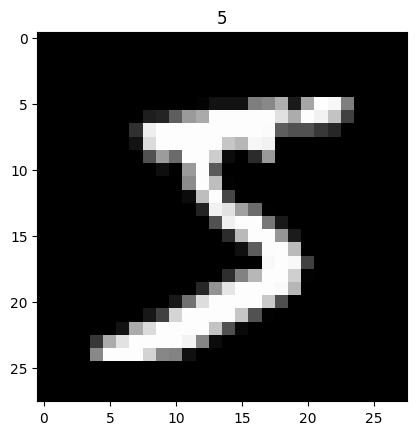

훈련용 데이터의 형태: (60000, 784) 테스트용 데이터의 형태: (10000, 784)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(x_train,t_train),(x_test,t_test)=mnist.load_data() #MNIST 읽어 들이기
print(x_train.shape,x_test.shape) #28X28의 손으로 쓴 문자 이미지가 6만 장
#각 픽셀의 값을 0-1 범위에 넣는다
x_train=x_train/255
x_test=x_test/255
#손으로 쓴 문자 이미지를 1개 표시
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.title(t_train[0])
plt.show()
#1차원으로 변환한다
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print("훈련용 데이터의 형태:",x_train.shape,"테스트용 데이터의 형태:",x_test.shape)
#훈련용 데이터를 준비한다

In [6]:
epochs=20
batch_size=128
n_in_out=784 #입출력층의 뉴런 수
n_mid=64 #중간층의 뉴런 수
#오토인코더의 각 설정

In [7]:
Model(입력,출력)
#[Model 클래스의 설정]

NameError: ignored

In [8]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input,Dense
#각 층
x=Input(shape=(n_in_out,)) #입력
encoder=Dense(n_mid,activation="relu") #Encoder
decoder=Dense(n_in_out,activation='sigmoid') #D ecoder
#망
h=encoder(x)
y=decoder(h)
#오토인코더의 모델
model_autoencoder=Model(x,y)
model_autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
model_autoencoder.summary()
print()
#Encoder만의 모델
model_encoder=Model(x,h)
model_encoder.summary()
print()
#Decoder만의 모델
input_decoder=Input(shape=(n_mid,))
model_decoder=Model(input_decoder,decoder(input_decoder))
model_decoder.summary()
#오토인커다 모델의 구축

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
Total params: 50,240
Trainable params

In [9]:
model_autoencoder.fit(x_train,x_train,shuffle=True,epochs=epochs,batch_size=batch_size,validation_data=(x_test,x_test))
#오토인코더의 학습

Epoch 1/20
469/469 [==============================] - 9s 16ms/step - loss: 0.1991 - val_loss: 0.1316
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1153 - val_loss: 0.1014
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0954 - val_loss: 0.0883
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0856 - val_loss: 0.0817
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0805 - val_loss: 0.0781
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0779 - val_loss: 0.0763
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0764 - val_loss: 0.0752
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0755 - val_loss: 0.0745
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0749 - val_loss: 0.0739
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0745 - val_loss: 0.0

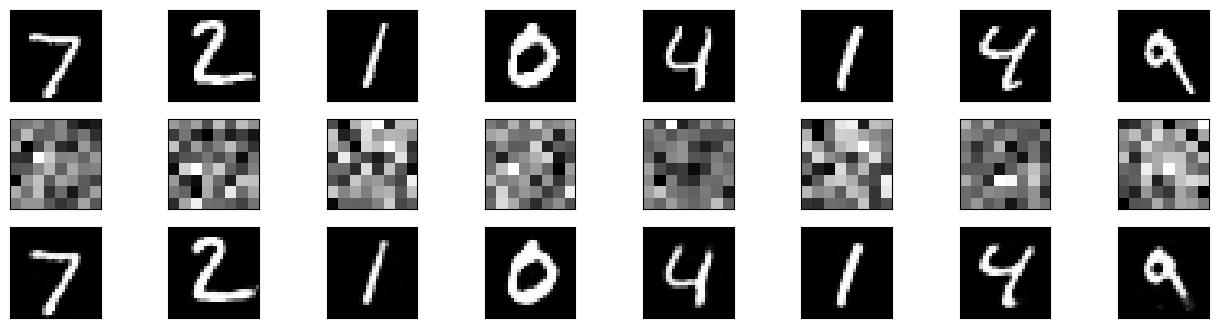

In [11]:
encoded=model_encoder.predict(x_test)
decoded=model_decoder.predict(encoded)
n=8 #표시할 이미지 수
plt.figure(figsize=(16,4))
for i in range(n):
  #입력이미지
  ax=plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys_r')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #중간층의 출력
  ax=plt.subplot(3,n,i+1+n)
  plt.imshow(encoded[i].reshape(8,8),cmap='Greys_r') #이미지 크기는 중간층의 뉴런 수에 맞춰서 변경한다
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #출력이미지
  ax=plt.subplot(3,n,i+1+2*n)
  plt.imshow(decoded[i].reshape(28,28),cmap='Greys_r')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
#오토인코더에 의한 이미지 생성

(60000, 28, 28) (10000, 28, 28)


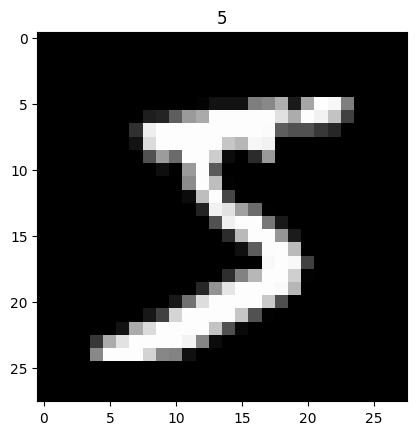

훈련용 데이터의 형태: (60000, 784) 테스트용 데이터의 형태: (10000, 784)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(x_train,t_train),(x_test,t_test)=mnist.load_data() #MNIST 읽어 들이기
print(x_train.shape,x_test.shape) #28x28의 손으로 쓴 문자 이미지가 6만 장
#각 픽셀의 값을 0-1의 범위에 넣는다
x_train=x_train/255
x_test=x_test/255
#손으로 쓴 문자 이미지를 1개 표시
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.title(t_train[0])
plt.show()
#1차원으로 변환한다
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print("훈련용 데이터의 형태:",x_train.shape,"테스트용 데이터의 형태:",x_test.shape)
#훈련용 데이터의 준비

In [15]:
epochs=10
batch_size=128
n_in_out=784 #입출력층의 뉴런 수
n_z=2 #잠재 변수의 수(차원 수)
n_mid=256 #중간층의 뉴런 수
#VAE의 각 설정

In [19]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import metrics #평가 함수
from tensorflow.python.keras.layers import Input, Dense, Lambda
from tensorflow.python.keras import backend as K #난수의 발생에 사용
#잠재 변수를 샘플링하기 위한 함수
def z_sample(args):
  mu,log_var=args #잠재 변수의 평균값과 분산의 대수
  epsilon=K.random_normal(shape=K.shape(log_var),mean=0,stddev=1)
  return mu+epsilon*K.exp(log_var/2) #Reparametrization Trick에 의해 잠재 변수를 구한다
#Encoder
x=Input(shape=(n_in_out,))
h_encoder=Dense(n_mid,activation='relu')(x)
mu=Dense(n_z)(h_encoder)
log_var=Dense(n_z)(h_encoder)
z=Lambda(z_sample,output_shape=(n_z,))([mu,log_var])
#Decoder
mid_decoder=Dense(n_mid,activation='relu') #뒤에서 사용
h_decoder=mid_decoder(z)
out_decoder=Dense(n_in_out,activation='sigmoid') #뒤에서 사용
y=out_decoder(h_decoder)
#VAE의 모델을 생성
model_vae=Model(x,y)
#손실 함수
eps=1e-7 #log안이 0이 되는 것을 막는다
rec_loss=K.sum(-x*K.log(y+eps)-(1-x)*K.log(1-y+eps))/batch_size #재구성 오차
reg_loss=-0.5*K.sum(1+log_var-K.square(mu)-K.exp(log_var))/batch_size #정칙화 향
vae_loss=rec_loss + reg_loss
model_vae.add_loss(vae_loss)
model_vae.compile(optimizer='adam')
model_vae.summary()
#VAE의 모델 구축

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 256)          200960      input_6[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 2)            514         dense_17[0][0]                   
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 2)            514         dense_17[0][0]                   
____________________________________________________________________________________________

In [20]:
model_vae.fit(x_train,x_train,shuffle=True,epochs=epochs,batch_size=batch_size,validation_data=(x_test,None))
#VAE의 학습

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 204.1525 - val_loss: 175.0769
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 173.4712 - val_loss: 168.2839
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 169.2862 - val_loss: 165.8746
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 166.5861 - val_loss: 163.2999
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 164.2408 - val_loss: 161.5943
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 162.6426 - val_loss: 160.4628
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 161.3600 - val_loss: 159.1518
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 160.3009 - val_loss: 158.3531
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 159.4313 - val_loss: 157.6594
Epoch 10/10
469/469 [==============================] - 

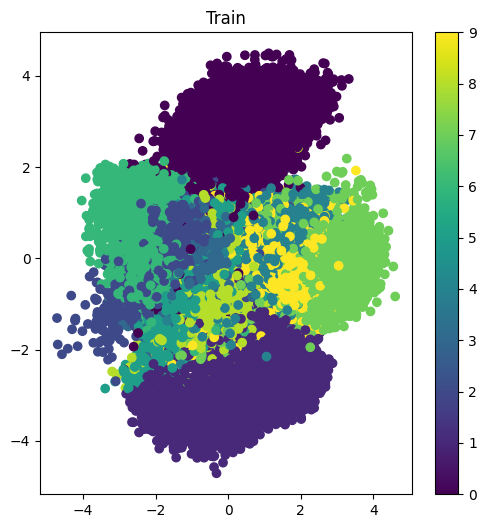

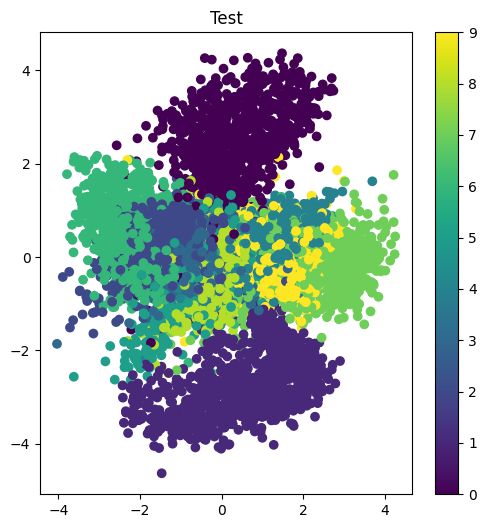

In [22]:
#잠재 변수를 얻기 위한 모델
encoder=Model(x,z)
#훈련 데이터로부터 만든 잠재 변수를 2차원 플롯
z_train=encoder.predict(x_train,batch_size=batch_size)
plt.figure(figsize=(6,6))
plt.scatter(z_train[:,0],z_train[:,1],c=t_train) #라벨을 색으로 나타낸다
plt.title('Train')
plt.colorbar()
plt.show()
#테스트 데이터를 입력해서 잠재 공간에 2차원 플롯한다 정답 라벨을 색으로 표시
z_test=encoder.predict(x_test,batch_size=batch_size)
plt.figure(figsize=(6,6))
plt.scatter(z_test[:,0],z_test[:,1],c=t_test)
plt.title('Test')
plt.colorbar()
plt.show()
#잠재 공간의 가시화

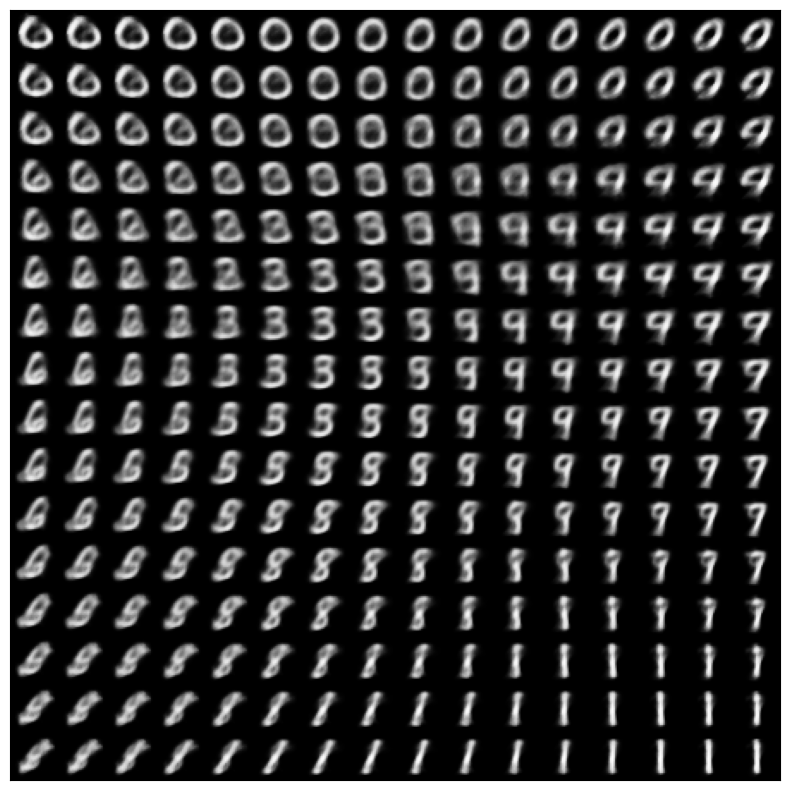

In [24]:
#이미지 생성기
input_decoder=Input(shape=(n_z,))
h_decoder=mid_decoder(input_decoder)
y=out_decoder(h_decoder)
generator=Model(input_decoder,y)
#이미지를 나열하는 설정
n=16 #손으로 쓴 문자 이미지를 16x16 나열한다
image_size=28
matrix_image=np.zeros((image_size*n,image_size*n)) #전체 이미지
#잠재 변수
z_1=np.linspace(2,-2,n) #각 행
z_2=np.linspace(-2,2,n) #각 열
#잠재 변수를 변화 시켜서 이미지를 생성
for i, z1 in enumerate(z_1):
  for j, z2 in enumerate(z_2):
    decoded=generator.predict(np.array([[z2,z1]])) #x축,y축의 순서로 넣는다
    image=decoded[0].reshape(image_size,image_size)
    matrix_image[i*image_size:(i+1)*image_size,j*image_size: (j+1)*image_size]=image
plt.figure(figsize=(10,10))
plt.imshow(matrix_image,cmap='Greys_r')
plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False) #축 눈금의 라벨과 선을 지운다
plt.show()
#잠재 변수를 연속적으로 변화시켜서 이미지를 생성